In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from importlib import reload
import pickle as pkl
import json
import re
from collections import defaultdict

import gc
import numpy as np
import scipy.sparse
import pandas as pd
import scanpy as sc
from MulticoreTSNE import MulticoreTSNE as TSNE

import visage_pb2

In [2]:
with open('./temp/X_rel', 'rb') as f:
  X_rel = pkl.load(f)
with open('./results/idx_merged', 'rb') as f:
  idx_merged = pkl.load(f)
with open('./results/obs_merged', 'rb') as f:
  obs_merged = pkl.load(f)

In [21]:
obs_merged.groupby(['cell_ontology_class']).count().head(20)

,FACS.selection,age,cell,cell_ontology_id,free_annotation,method,mouse.id,sex,subtissue,tissue,n_genes,n_counts,tissue_free_annotation
cell_ontology_class,,,,,,,,,,,,,
B cell,5629,36349,36349,36349,36349,36349,36349,36349,36349,36349,30431,5629,30720
Bergmann glial cell,54,54,54,54,54,54,54,54,54,54,54,54,0
Brush cell of epithelium proper of large intestine,175,175,175,175,175,175,175,175,175,175,175,175,0
"CD4-positive, alpha-beta T cell",1170,1721,1721,1721,1721,1721,1721,1721,1721,1721,1598,1170,551
"CD8-positive, alpha-beta T cell",1070,1940,1940,1940,1940,1940,1940,1940,1940,1940,1870,1070,870
DN3 thymocyte,0,146,146,146,146,146,146,146,146,146,113,0,146
DN4 thymocyte,1756,3756,3756,3756,3756,3756,3756,3756,3756,3756,3502,1756,2000
Kupffer cell,262,2808,2808,2808,2808,2808,2808,2808,2808,2808,2795,262,2546
Langerhans cell,0,175,175,175,175,175,175,175,175,175,137,0,175


In [22]:
subset_idx = (obs_merged.cell_ontology_class == 'basal cell').values
X_subset = X_rel[subset_idx]
tsne = TSNE(n_jobs=6, n_iter=3000, perplexity=3, random_state=666)  # , init=PCAinit
embeddings = tsne.fit_transform(X_subset.todense())

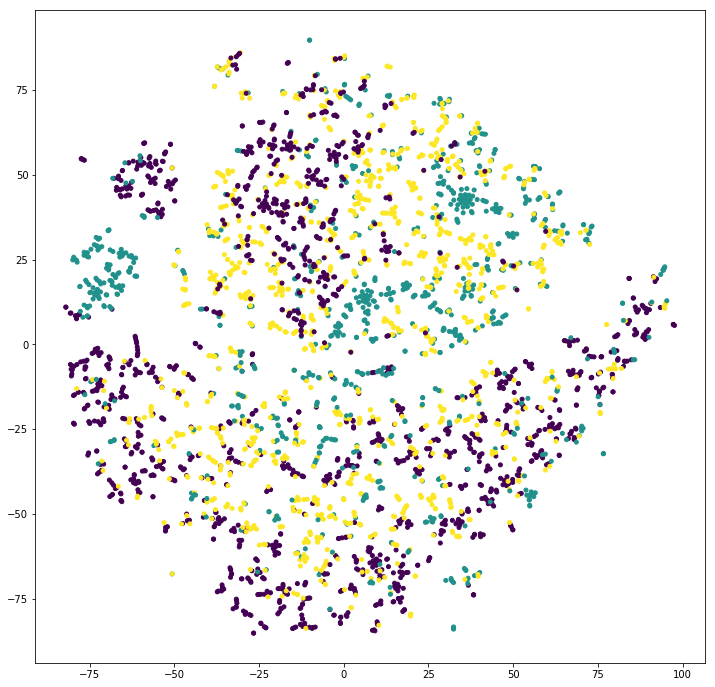

In [25]:
# Ref: https://stackoverflow.com/a/2669120
def sorted_nicely( l ): 
    """ Sort the given iterable in the way that humans expect.""" 
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)
  

ages = { k: i for i, k in enumerate(sorted_nicely(np.unique(obs_merged.age))) }

fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(
  embeddings[:, 0], 
  embeddings[:, 1], 
  s=16, 
  c=list(map(lambda x: ages[x], obs_merged[subset_idx].age.values))
)